In [3]:
# Import the libraries
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
import tools.graph_processing as gp
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 15})

In [4]:
def graph_remove_dummy_nodes(graph):
    nodes_dummy_true = [x for x,y in graph.nodes(data=True) if y['is_dummy']==True]
    graph.remove_nodes_from(nodes_dummy_true)
    #print(len(graph.nodes))
    return graph

In [15]:
path_left_OASIS = '../data/OASIS_graphs_both_hemi/OASIS_left/'
path_right_OASIS = '../data/OASIS_graphs_both_hemi/OASIS_right/'

path_left = '../data/HCP/modified_graphs_left/'
path_right = '../data/HCP/modified_graphs_right/'

# Load HCP graphs  -----------
HCP_original_graph_left = [graph_remove_dummy_nodes(nx.read_gpickle(path_left + g)) for g in os.listdir(path_left)]
HCP_nb_orig_left = [nx.number_of_nodes(g) for g in HCP_original_graph_left]

HCP_original_graph_right = [graph_remove_dummy_nodes(nx.read_gpickle(path_right + g)) for g in os.listdir(path_right)]
HCP_nb_orig_right = [nx.number_of_nodes(g) for g in HCP_original_graph_right]

# Load OASIS graphs ------------

OASIS_graphs_left = gp.load_graphs_in_list(path_left_OASIS)
OASIS_nb_nodes_left = [nx.number_of_nodes(g) for g in OASIS_graphs_left]

OASIS_graphs_right = gp.load_graphs_in_list(path_right_OASIS)
OASIS_nb_nodes_right = [nx.number_of_nodes(g) for g in OASIS_graphs_right]

/home/rohit/anaconda3/envs/Slam_python_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rohit/anaconda3/envs/Slam_python_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rohit/anaconda3/envs/Slam_python_3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

Text(0, 0.5, 'Density')

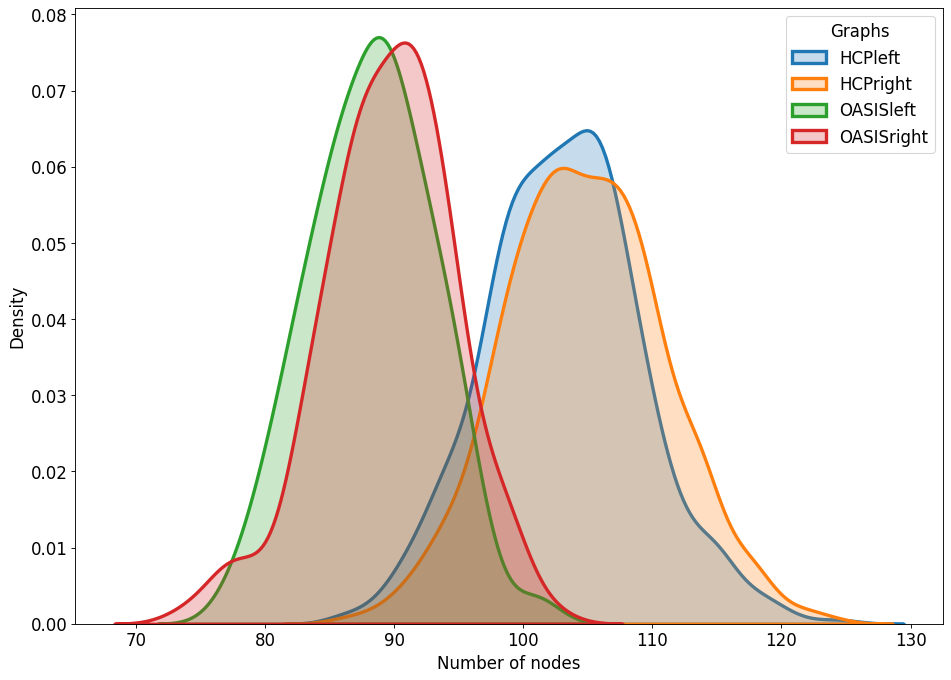

In [16]:
figure(figsize=(14, 10), dpi=80)
# List of graph folders to plot
graphs = ['HCPleft', 'HCPright','OASISleft','OASISright']

    
# Draw the density plot
sns.distplot(HCP_nb_orig_left, hist = False, kde = True,
         kde_kws = {'shade': True,'linewidth': 3}, label=graphs[0])

sns.distplot(HCP_nb_orig_right, hist = False, kde = True,
         kde_kws = {'shade': True,'linewidth': 3}, label=graphs[1])

sns.distplot(OASIS_nb_nodes_left, hist = False, kde = True,
         kde_kws = {'shade': True,'linewidth': 3}, label=graphs[2])

sns.distplot(OASIS_nb_nodes_right, hist = False, kde = True,
         kde_kws = {'shade': True,'linewidth': 3}, label=graphs[3])

# Plot formatting

plt.legend(prop={'size': 15}, title = 'Graphs')
plt.title('')
plt.xlabel('Number of nodes')
plt.ylabel('Density')